<a href="https://colab.research.google.com/github/OlajideFemi/Carbon-Footprint/blob/main/Another_copy_of_Energy_Consumption_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Energy Consumption Forecasting

<p><b>Problem Statement</b></p>

The objective is to forecast electricity demand over future time periods in order to support operational planning, cost control, and infrastructure resilience.
Accurate demand forecasting is critical because electricity systems must balance supply and demand in real time. Over- or under-estimation can result in service disruption, increased costs, or system instability.


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


# Load demand
#demand = pd.read_csv("historic_demand_2009_2024.csv", parse_dates=["timestamp"])
# Load demand
demand = pd.read_csv("historic_demand_2009_2024.csv")

# Load weather
#weather = pd.read_csv("uk_weather.csv", parse_dates=["date"])

# Load weather
#weather = pd.read_csv("uk_weather.csv", parse_dates=["date"])


In [ ]:
demand.head()

,Unnamed: 0,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,...,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,scottish_transfer,viking_flow,greenlink_flow,is_holiday
0,0,2009-01-01,1,37910,38704,33939,54,1403,0.0,0.0,...,0.0,-161.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1,2009-01-01,2,38047,38964,34072,53,1403,0.0,0.0,...,0.0,-160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
2,2,2009-01-01,3,37380,38651,33615,53,1403,0.0,0.0,...,0.0,-160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
3,3,2009-01-01,4,36426,37775,32526,50,1403,0.0,0.0,...,0.0,-160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
4,4,2009-01-01,5,35687,37298,31877,50,1403,0.0,0.0,...,0.0,-160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
demand.dtypes

,0
Unnamed: 0,int64
settlement_date,object
settlement_period,int64
nd,int64
tsd,int64
england_wales_demand,int64
embedded_wind_generation,int64
embedded_wind_capacity,int64
embedded_solar_generation,float64
embedded_solar_capacity,float64


In [ ]:
demand.shape

(251218, 24)

In [ ]:
demand.describe()

,Unnamed: 0,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,scottish_transfer,viking_flow,greenlink_flow,is_holiday
count,251218.0000,251218.000000,251218.000000,251218.000000,251218.000000,251218.000000,251218.000000,251217.000000,251217.000000,251217.000000,...,251217.000000,251217.000000,251217.000000,251217.000000,75921.000000,75921.000000,5793.000000,5793.0,0.0,251217.000000
mean,125608.5000,24.499180,31821.016918,33207.693780,28946.987863,1211.807673,4212.647700,796.906332,7810.549035,7.397127,...,542.987071,-107.993444,-25.274802,151.291620,187.524782,-51.635055,2089.604350,0.0,NaN,0.022877
std,72520.5343,13.853468,7768.569564,7697.897556,7043.277343,925.479143,1925.667757,1594.926927,5541.149436,41.211838,...,507.313822,223.132768,250.882270,387.974761,491.876372,364.936104,1808.477656,0.0,NaN,0.149510
min,0.0000,1.000000,13367.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,-24.000000,...,-1215.000000,-505.000000,-585.000000,-1022.000000,-1455.000000,-1028.000000,-1861.000000,0.0,NaN,0.000000
25%,62804.2500,12.000000,25610.000000,27229.000000,23290.000000,520.000000,2085.000000,0.000000,1820.000000,0.000000,...,0.000000,-251.000000,-127.000000,0.000000,0.000000,0.000000,676.000000,0.0,NaN,0.000000
50%,125608.5000,24.000000,31255.000000,32453.000000,28412.500000,971.000000,4152.000000,0.000000,9300.000000,0.000000,...,766.000000,-120.000000,0.000000,0.000000,0.000000,0.000000,1975.000000,0.0,NaN,0.000000
75%,188412.7500,36.000000,37529.000000,38681.000000,34166.000000,1648.000000,6231.000000,732.000000,13080.000000,0.000000,...,994.000000,45.000000,5.000000,0.000000,401.000000,0.000000,3324.000000,0.0,NaN,0.000000
max,251217.0000,50.000000,59095.000000,60147.000000,53325.000000,5354.000000,6574.000000,9830.000000,15407.000000,893.000000,...,1143.000000,499.000000,504.000000,1033.000000,1401.000000,1002.000000,6238.000000,0.0,NaN,1.000000


In [ ]:
import pandas as pd

demand["settlement_date"] = pd.to_datetime(demand["settlement_date"])

demand["timestamp"] = (
    demand["settlement_date"]
    + pd.to_timedelta((demand["settlement_period"] - 1) * 30, unit="min")
)

demand = demand.set_index("timestamp").sort_index()


<Axes: xlabel='timestamp'>

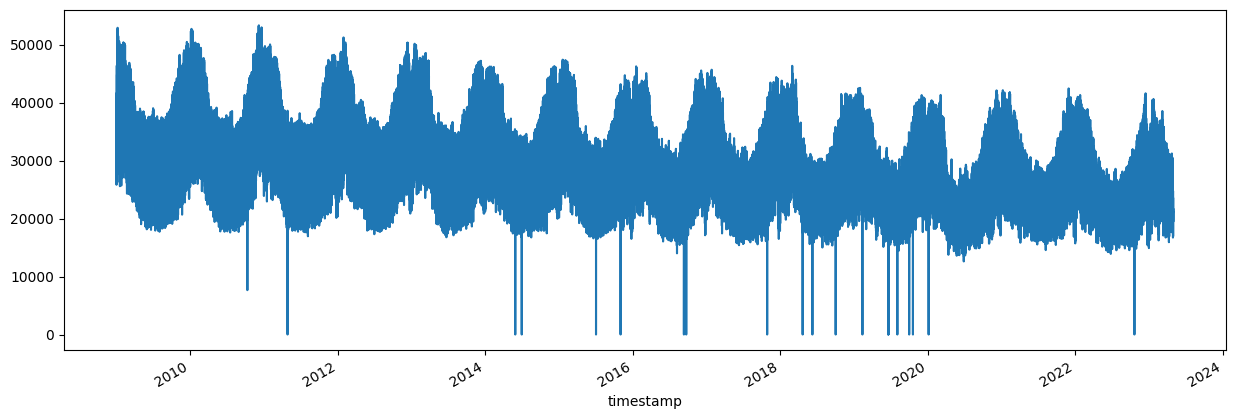

In [ ]:
demand["england_wales_demand"].plot(figsize=(15,5))


In [ ]:
demand["england_wales_demand"].describe()


,england_wales_demand
count,251218.000000
mean,28946.987863
std,7043.277343
min,0.000000
25%,23290.000000
50%,28412.500000
75%,34166.000000
max,53325.000000


In [ ]:
demand["bad_reading"] = demand["england_wales_demand"] < 10000


In [ ]:
demand[demand["bad_reading"]]["england_wales_demand"].count()


np.int64(22)

In [ ]:
demand.loc[demand["bad_reading"], "england_wales_demand"] = None
demand["england_wales_demand"] = demand["england_wales_demand"].interpolate(method="time")


<Axes: xlabel='timestamp'>

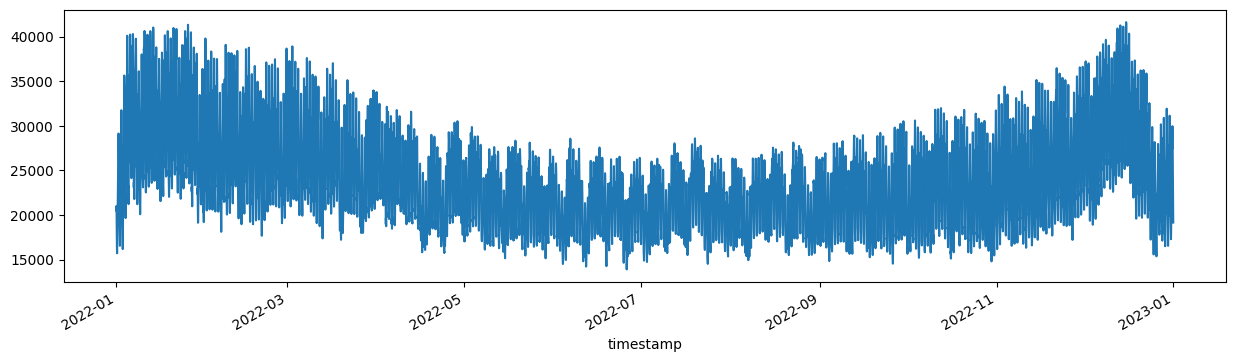

In [ ]:
demand.loc["2022"]["england_wales_demand"].plot(figsize=(15,4))


<Axes: xlabel='hour'>

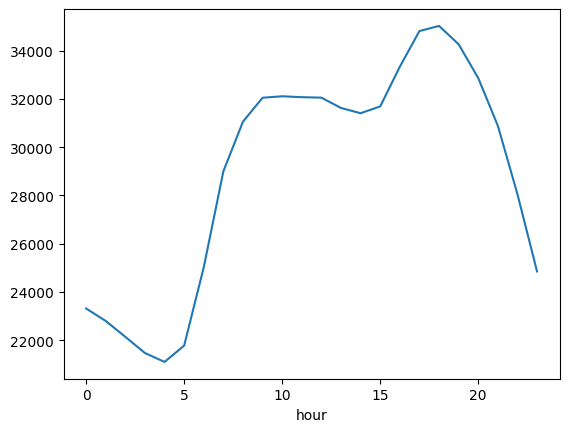

In [ ]:
demand["hour"] = demand.index.hour

demand.groupby("hour")["england_wales_demand"].mean().plot()


<Axes: xlabel='timestamp'>

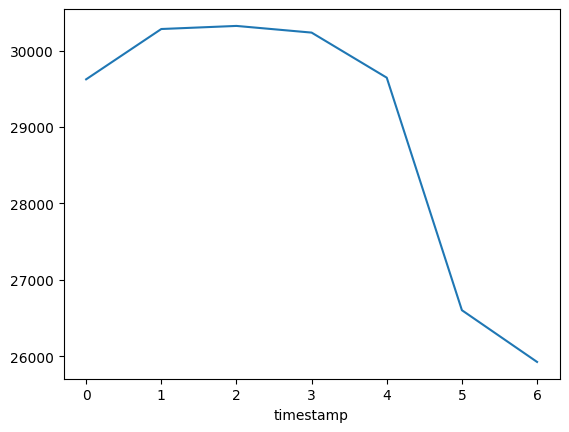

In [ ]:
demand.groupby(demand.index.dayofweek)["england_wales_demand"].mean().plot()


<Axes: title={'center': 'england_wales_demand'}, xlabel='month'>

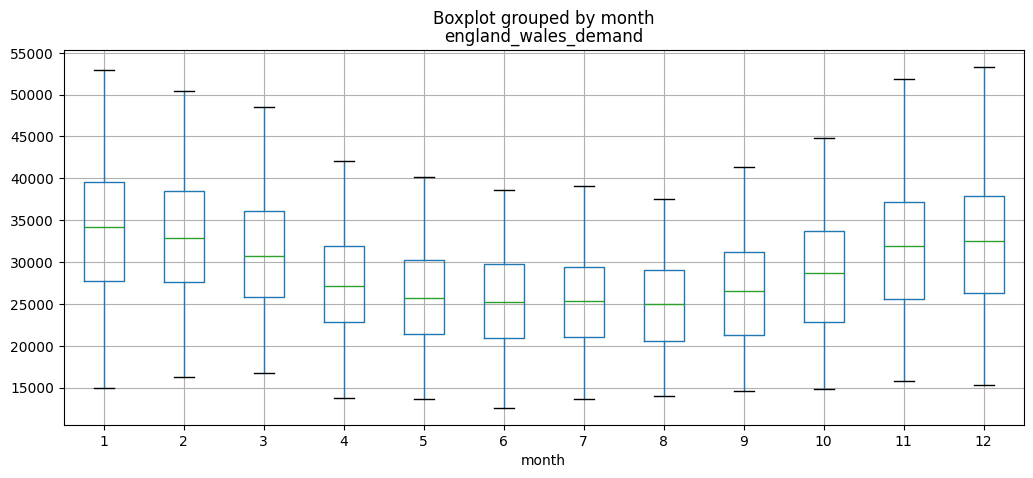

In [ ]:
demand["month"] = demand.index.month

demand.boxplot(
    column="england_wales_demand",
    by="month",
    figsize=(12,5)
)


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
demand = pd.read_csv("historic_demand_2009_2024.csv")


demand['timestamp'] = pd.to_datetime(demand['settlement_date']) + \
                     pd.to_timedelta((demand['settlement_period'] - 1) * 30, unit='m')

# Set timestamp as index
demand.set_index('timestamp', inplace=True)
demand.sort_index(inplace=True)

# Drop unnecessary columns
demand = demand.drop(columns=['Unnamed: 0', 'settlement_date', 'settlement_period'])

# Check data types
print("Data types:")
print(demand.dtypes)
print("\nMissing values:")
print(demand.isnull().sum())

Data types:
nd                             int64
tsd                            int64
england_wales_demand           int64
embedded_wind_generation       int64
embedded_wind_capacity         int64
embedded_solar_generation      int64
embedded_solar_capacity        int64
non_bm_stor                    int64
pump_storage_pumping           int64
ifa_flow                       int64
ifa2_flow                      int64
britned_flow                   int64
moyle_flow                     int64
east_west_flow                 int64
nemo_flow                      int64
nsl_flow                     float64
eleclink_flow                float64
scottish_transfer            float64
viking_flow                  float64
greenlink_flow               float64
is_holiday                     int64
dtype: object

Missing values:
nd                                0
tsd                               0
england_wales_demand              0
embedded_wind_generation          0
embedded_wind_capacity            0


In [ ]:
# First, recreate the timestamp correctly (based on your data structure)
# Assuming settlement_period is 1-48 (half-hourly)
demand['timestamp'] = pd.to_datetime(demand['settlement_date']) + \
                     pd.to_timedelta((demand['settlement_period'] - 1) * 30, unit='m')

# Set timestamp as index
demand.set_index('timestamp', inplace=True)
demand.sort_index(inplace=True)

# Drop unnecessary columns if they exist
columns_to_drop = ['Unnamed: 0', 'settlement_date', 'settlement_period']
demand = demand.drop(columns=[col for col in columns_to_drop if col in demand.columns])

print(f"Data shape: {demand.shape}")
print(f"Date range: {demand.index.min()} to {demand.index.max()}")
print(f"\nMissing values summary:")
print(demand.isnull().sum().sort_values(ascending=False))

KeyError: 'settlement_date'

In [ ]:
# First, let's see what columns are actually in your DataFrame
print("Columns in demand DataFrame:")
print(demand.columns.tolist())
print(f"\nDataFrame shape: {demand.shape}")

# Let's see the first few rows to understand the structure
print("\nFirst few rows:")
print(demand.head())

Columns in demand DataFrame:
['nd', 'tsd', 'england_wales_demand', 'embedded_wind_generation', 'embedded_wind_capacity', 'embedded_solar_generation', 'embedded_solar_capacity', 'non_bm_stor', 'pump_storage_pumping', 'ifa_flow', 'ifa2_flow', 'britned_flow', 'moyle_flow', 'east_west_flow', 'nemo_flow', 'nsl_flow', 'eleclink_flow', 'scottish_transfer', 'viking_flow', 'greenlink_flow', 'is_holiday']

DataFrame shape: (279264, 21)

First few rows:
                        nd    tsd  england_wales_demand  \
timestamp                                                 
2009-01-01 00:00:00  37910  38704                 33939   
2009-01-01 00:30:00  38047  38964                 34072   
2009-01-01 01:00:00  37380  38651                 33615   
2009-01-01 01:30:00  36426  37775                 32526   
2009-01-01 02:00:00  35687  37298                 31877   

                     embedded_wind_generation  embedded_wind_capacity  \
timestamp                                                         

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=== DATA VALIDATION ===\n")

# Check the date range and frequency
print(f"Data date range: {demand.index.min()} to {demand.index.max()}")
print(f"Number of periods: {len(demand):,}")
print(f"Expected periods for 15.5 years (2009-2024): {15.5 * 365.25 * 48:,.0f}")

# Check for missing timestamps
full_range = pd.date_range(start=demand.index.min(), end=demand.index.max(), freq='30min')
missing_timestamps = full_range.difference(demand.index)
print(f"Missing timestamps: {len(missing_timestamps)}")

# Check data consistency
print(f"\nData frequency: {pd.infer_freq(demand.index)}")
print(f"Is index monotonic increasing? {demand.index.is_monotonic_increasing}")
print(f"Is index unique? {demand.index.is_unique}")

# Check for duplicates
duplicates = demand.index.duplicated().sum()
print(f"Duplicate timestamps: {duplicates}")

if duplicates > 0:
    print("Removing duplicates...")
    demand = demand[~demand.index.duplicated(keep='first')]

print("\n=== BASIC STATISTICS ===")
print(f"Shape after cleaning: {demand.shape}")

=== DATA VALIDATION ===

Data date range: 2009-01-01 00:00:00 to 2024-12-05 23:30:00
Number of periods: 279,264
Expected periods for 15.5 years (2009-2024): 271,746
Missing timestamps: 32

Data frequency: None
Is index monotonic increasing? True
Is index unique? False
Duplicate timestamps: 32
Removing duplicates...

=== BASIC STATISTICS ===
Shape after cleaning: (279232, 21)


In [ ]:
def create_comprehensive_features(df):
    """
    Create comprehensive features for electricity demand forecasting
    """
    df_feat = df.copy()

    # 1. Temporal Features
    df_feat['hour'] = df_feat.index.hour
    df_feat['minute'] = df_feat.index.minute
    df_feat['half_hour_period'] = df_feat['hour'] * 2 + (df_feat['minute'] // 30)
    df_feat['day_of_week'] = df_feat.index.dayofweek  # Monday=0, Sunday=6
    df_feat['day_of_month'] = df_feat.index.day
    df_feat['month'] = df_feat.index.month
    df_feat['quarter'] = df_feat.index.quarter
    df_feat['year'] = df_feat.index.year
    df_feat['day_of_year'] = df_feat.index.dayofyear
    df_feat['week_of_year'] = df_feat.index.isocalendar().week

    # 2. Calendar Features
    df_feat['is_weekend'] = (df_feat['day_of_week'] >= 5).astype(int)
    df_feat['is_weekday'] = (df_feat['day_of_week'] < 5).astype(int)
    df_feat['is_working_day'] = ((df_feat['day_of_week'] < 5) & (df_feat['is_holiday'] == 0)).astype(int)

    # Special periods
    df_feat['is_morning_peak'] = ((df_feat['hour'] >= 7) & (df_feat['hour'] <= 10)).astype(int)
    df_feat['is_evening_peak'] = ((df_feat['hour'] >= 16) & (df_feat['hour'] <= 20)).astype(int)
    df_feat['is_overnight'] = ((df_feat['hour'] >= 0) & (df_feat['hour'] <= 5)).astype(int)

    # 3. Calculate Net Demand
    df_feat['embedded_total_generation'] = df_feat['embedded_wind_generation'] + df_feat['embedded_solar_generation']
    df_feat['net_demand'] = df_feat['england_wales_demand'] - df_feat['embedded_total_generation']

    # 4. Capacity Factors
    # Avoid division by zero
    df_feat['wind_capacity_factor'] = np.where(
        df_feat['embedded_wind_capacity'] > 0,
        df_feat['embedded_wind_generation'] / df_feat['embedded_wind_capacity'],
        0
    )
    df_feat['solar_capacity_factor'] = np.where(
        df_feat['embedded_solar_capacity'] > 0,
        df_feat['embedded_solar_generation'] / df_feat['embedded_solar_capacity'],
        0
    )

    # 5. Interconnector Analysis
    interconnector_cols = [col for col in df.columns if '_flow' in col]

    # Fill missing values in interconnectors (new interconnectors commissioned over time)
    for col in interconnector_cols:
        # Fill forward, then backward, then 0
        df_feat[col] = df_feat[col].fillna(method='ffill').fillna(method='bfill').fillna(0)

    # Calculate interconnector statistics
    df_feat['total_interconnector_flow'] = df_feat[interconnector_cols].sum(axis=1)
    df_feat['interconnector_imports'] = df_feat[interconnector_cols].clip(lower=0).sum(axis=1)
    df_feat['interconnector_exports'] = df_feat[interconnector_cols].clip(upper=0).abs().sum(axis=1)

    # 6. Cyclical Encoding for Time Features
    # Hour encoding
    df_feat['hour_sin'] = np.sin(2 * np.pi * df_feat['hour'] / 24)
    df_feat['hour_cos'] = np.cos(2 * np.pi * df_feat['hour'] / 24)

    # Day of week encoding
    df_feat['day_of_week_sin'] = np.sin(2 * np.pi * df_feat['day_of_week'] / 7)
    df_feat['day_of_week_cos'] = np.cos(2 * np.pi * df_feat['day_of_week'] / 7)

    # Month encoding
    df_feat['month_sin'] = np.sin(2 * np.pi * df_feat['month'] / 12)
    df_feat['month_cos'] = np.cos(2 * np.pi * df_feat['month'] / 12)

    # 7. Lag Features (Autoregressive)
    # Previous periods
    df_feat['demand_lag_1'] = df_feat['england_wales_demand'].shift(1)  # Previous half-hour
    df_feat['demand_lag_2'] = df_feat['england_wales_demand'].shift(2)  # Previous hour
    df_feat['demand_lag_48'] = df_feat['england_wales_demand'].shift(48)  # Previous day same period
    df_feat['demand_lag_336'] = df_feat['england_wales_demand'].shift(336)  # Previous week same period

    # Net demand lags
    df_feat['net_demand_lag_48'] = df_feat['net_demand'].shift(48)

    # 8. Rolling Statistics
    # Short-term (daily) patterns
    df_feat['demand_rolling_24h_mean'] = df_feat['england_wales_demand'].rolling(window=48, min_periods=1).mean()
    df_feat['demand_rolling_24h_std'] = df_feat['england_wales_demand'].rolling(window=48, min_periods=1).std()

    # Medium-term (weekly) patterns
    df_feat['demand_rolling_7d_mean'] = df_feat['england_wales_demand'].rolling(window=336, min_periods=1).mean()
    df_feat['demand_rolling_7d_std'] = df_feat['england_wales_demand'].rolling(window=336, min_periods=1).std()

    # 9. Rate of Change
    df_feat['demand_change_1h'] = df_feat['england_wales_demand'].diff(2)  # Change over 1 hour
    df_feat['demand_change_24h'] = df_feat['england_wales_demand'].diff(48)  # Change over 24 hours

    # 10. Penetration Rates
    df_feat['wind_penetration'] = df_feat['embedded_wind_generation'] / df_feat['england_wales_demand'].replace(0, np.nan)
    df_feat['solar_penetration'] = df_feat['embedded_solar_generation'] / df_feat['england_wales_demand'].replace(0, np.nan)
    df_feat['total_renewable_penetration'] = (df_feat['embedded_wind_generation'] + df_feat['embedded_solar_generation']) / df_feat['england_wales_demand'].replace(0, np.nan)

    # 11. Season Indicators
    seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
               6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn',
               11: 'Autumn', 12: 'Winter'}
    df_feat['season'] = df_feat['month'].map(seasons)

    # Create dummy variables for seasons
    season_dummies = pd.get_dummies(df_feat['season'], prefix='season')
    df_feat = pd.concat([df_feat, season_dummies], axis=1)

    # 12. Time of Day Categories
    time_of_day = []
    for h in df_feat['hour']:
        if 0 <= h < 6:
            time_of_day.append('Night')
        elif 6 <= h < 9:
            time_of_day.append('Morning Peak')
        elif 9 <= h < 16:
            time_of_day.append('Day')
        elif 16 <= h < 19:
            time_of_day.append('Evening Peak')
        else:
            time_of_day.append('Evening')
    df_feat['time_of_day'] = time_of_day

    # Create dummy variables for time of day
    time_dummies = pd.get_dummies(df_feat['time_of_day'], prefix='time')
    df_feat = pd.concat([df_feat, time_dummies], axis=1)

    # 13. Fill any remaining NaN values
    # Forward fill for lag features, then backward fill
    df_feat = df_feat.fillna(method='ffill').fillna(method='bfill')

    # Final check for any remaining NaN
    if df_feat.isnull().sum().sum() > 0:
        print(f"Warning: {df_feat.isnull().sum().sum()} NaN values remaining")
        df_feat = df_feat.fillna(0)

    print(f"Total features created: {len(df_feat.columns)}")
    return df_feat

# Apply feature engineering
print("\n=== CREATING FEATURES ===")
demand_features = create_comprehensive_features(demand)
print(f"Original columns: {len(demand.columns)}")
print(f"Enhanced features: {len(demand_features.columns)}")


=== CREATING FEATURES ===


/tmp/ipython-input-1513913476.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_feat[col] = df_feat[col].fillna(method='ffill').fillna(method='bfill').fillna(0)
/tmp/ipython-input-1513913476.py:131: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_feat = df_feat.fillna(method='ffill').fillna(method='bfill')


Total features created: 75
Original columns: 21
Enhanced features: 75



=== EXPLORATORY DATA ANALYSIS ===

1. BASIC STATISTICS:
--------------------------------------------------
                               Mean      Std   Min    Max   Median
england_wales_demand       28389.73  7087.66     0  53325  27757.0
net_demand                 26241.37  7765.08 -7942  53223  25455.0
embedded_total_generation   2148.37  2095.75     0  14491   1382.0


/tmp/ipython-input-1497804537.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_gen = df.resample('M').mean()


TypeError: agg function failed [how->mean,dtype->object]

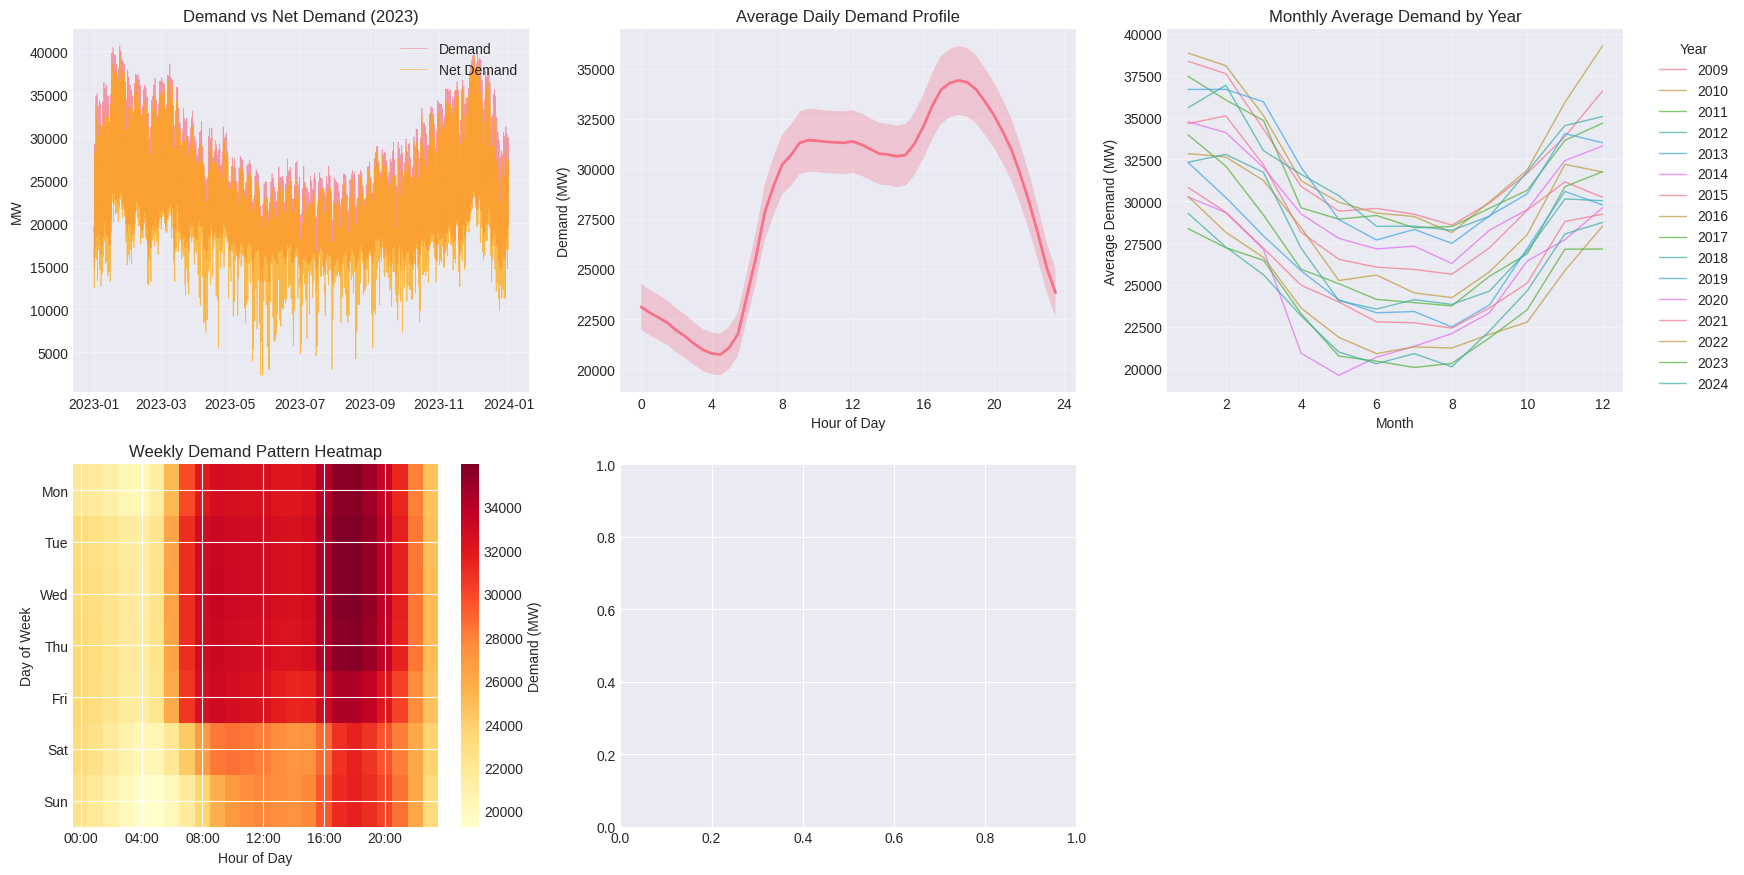

In [ ]:
def perform_comprehensive_eda(df, sample_year=2023):
    """
    Perform comprehensive exploratory data analysis
    """
    print(f"\n=== EXPLORATORY DATA ANALYSIS ===\n")

    # Basic statistics
    print("1. BASIC STATISTICS:")
    print("-" * 50)
    stats_df = pd.DataFrame({
        'Mean': df[['england_wales_demand', 'net_demand', 'embedded_total_generation']].mean(),
        'Std': df[['england_wales_demand', 'net_demand', 'embedded_total_generation']].std(),
        'Min': df[['england_wales_demand', 'net_demand', 'embedded_total_generation']].min(),
        'Max': df[['england_wales_demand', 'net_demand', 'embedded_total_generation']].max(),
        'Median': df[['england_wales_demand', 'net_demand', 'embedded_total_generation']].median()
    })
    print(stats_df.round(2))

    # Create visualizations
    fig = plt.figure(figsize=(20, 16))

    # 1. Time series of demand (last year for clarity)
    ax1 = plt.subplot(3, 3, 1)
    last_year = df.loc[f'{sample_year}-01-01':f'{sample_year}-12-31']
    ax1.plot(last_year.index, last_year['england_wales_demand'],
             linewidth=0.5, alpha=0.7, label='Demand')
    ax1.plot(last_year.index, last_year['net_demand'],
             linewidth=0.5, alpha=0.7, label='Net Demand', color='orange')
    ax1.set_title(f'Demand vs Net Demand ({sample_year})')
    ax1.set_ylabel('MW')
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)

    # 2. Average daily profile
    ax2 = plt.subplot(3, 3, 2)
    daily_profile = df.groupby(['hour', 'minute'])['england_wales_demand'].mean().reset_index()
    daily_profile['time'] = daily_profile['hour'] + daily_profile['minute']/60
    ax2.plot(daily_profile['time'], daily_profile['england_wales_demand'], linewidth=2)
    ax2.fill_between(daily_profile['time'],
                     daily_profile['england_wales_demand'] * 0.95,
                     daily_profile['england_wales_demand'] * 1.05,
                     alpha=0.3)
    ax2.set_title('Average Daily Demand Profile')
    ax2.set_xlabel('Hour of Day')
    ax2.set_ylabel('Demand (MW)')
    ax2.set_xticks(range(0, 25, 4))
    ax2.grid(True, alpha=0.3)

    # 3. Monthly patterns
    ax3 = plt.subplot(3, 3, 3)
    monthly_avg = df.groupby(['year', 'month'])['england_wales_demand'].mean().unstack()
    monthly_avg.T.plot(ax=ax3, alpha=0.7, linewidth=1)
    ax3.set_title('Monthly Average Demand by Year')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Average Demand (MW)')
    ax3.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, alpha=0.3)

    # 4. Weekly heatmap
    ax4 = plt.subplot(3, 3, 4)
    weekly_heatmap = df.groupby(['day_of_week', 'hour'])['england_wales_demand'].mean().unstack()
    im = ax4.imshow(weekly_heatmap, aspect='auto', cmap='YlOrRd')
    ax4.set_title('Weekly Demand Pattern Heatmap')
    ax4.set_xlabel('Hour of Day')
    ax4.set_ylabel('Day of Week')
    ax4.set_xticks(range(0, 24, 4))
    ax4.set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 4)])
    ax4.set_yticks(range(7))
    ax4.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.colorbar(im, ax=ax4, label='Demand (MW)')

    # 5. Embedded generation growth
    ax5 = plt.subplot(3, 3, 5)
    monthly_gen = df.resample('M').mean()
    ax5.plot(monthly_gen.index, monthly_gen['embedded_wind_generation'],
             label='Wind', linewidth=2)
    ax5.plot(monthly_gen.index, monthly_gen['embedded_solar_generation'],
             label='Solar', linewidth=2)
    ax5.set_title('Embedded Generation Growth')
    ax5.set_xlabel('Year')
    ax5.set_ylabel('Average Generation (MW)')
    ax5.legend()
    ax5.grid(True, alpha=0.3)

    # 6. Demand distribution
    ax6 = plt.subplot(3, 3, 6)
    ax6.hist(df['england_wales_demand'], bins=100, edgecolor='black', alpha=0.7)
    ax6.axvline(df['england_wales_demand'].mean(), color='red',
                linestyle='--', linewidth=2, label=f'Mean: {df["england_wales_demand"].mean():.0f} MW')
    ax6.axvline(df['england_wales_demand'].median(), color='green',
                linestyle='--', linewidth=2, label=f'Median: {df["england_wales_demand"].median():.0f} MW')
    ax6.set_title('Demand Distribution')
    ax6.set_xlabel('Demand (MW)')
    ax6.set_ylabel('Frequency')
    ax6.legend()
    ax6.grid(True, alpha=0.3)

    # 7. Interconnector usage over time
    ax7 = plt.subplot(3, 3, 7)
    interconnector_cols = [col for col in df.columns if '_flow' in col and 'total' not in col]
    yearly_interconnectors = df.resample('Y')[interconnector_cols].sum()
    yearly_interconnectors.plot.area(ax=ax7, alpha=0.7)
    ax7.set_title('Yearly Interconnector Flows')
    ax7.set_xlabel('Year')
    ax7.set_ylabel('Total Flow (GWh equivalent)')
    ax7.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax7.grid(True, alpha=0.3)

    # 8. Seasonal patterns
    ax8 = plt.subplot(3, 3, 8)
    seasonal_avg = df.groupby(['season', 'hour'])['england_wales_demand'].mean().unstack(level=0)
    seasonal_avg.plot(ax=ax8, linewidth=2)
    ax8.set_title('Seasonal Demand Patterns')
    ax8.set_xlabel('Hour of Day')
    ax8.set_ylabel('Demand (MW)')
    ax8.legend(title='Season')
    ax8.grid(True, alpha=0.3)

    # 9. Holiday vs non-holiday comparison
    ax9 = plt.subplot(3, 3, 9)
    holiday_comparison = df.groupby(['is_holiday', 'hour'])['england_wales_demand'].mean().unstack(level=0)
    holiday_comparison.columns = ['Non-Holiday', 'Holiday']
    holiday_comparison.plot(ax=ax9, linewidth=2)
    ax9.set_title('Holiday vs Non-Holiday Demand Patterns')
    ax9.set_xlabel('Hour of Day')
    ax9.set_ylabel('Demand (MW)')
    ax9.legend()
    ax9.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print additional insights
    print("\n2. KEY INSIGHTS:")
    print("-" * 50)

    # Peak demand analysis
    peak_demand = df['england_wales_demand'].max()
    peak_time = df['england_wales_demand'].idxmax()
    print(f"Peak Demand: {peak_demand:,.0f} MW at {peak_time}")

    # Minimum demand
    min_demand = df['england_wales_demand'].min()
    min_time = df['england_wales_demand'].idxmin()
    print(f"Minimum Demand: {min_demand:,.0f} MW at {min_time}")

    # Demand variability
    daily_peak = df.resample('D')['england_wales_demand'].max().mean()
    daily_min = df.resample('D')['england_wales_demand'].min().mean()
    print(f"Average Daily Peak: {daily_peak:,.0f} MW")
    print(f"Average Daily Minimum: {daily_min:,.0f} MW")
    print(f"Average Daily Range: {daily_peak - daily_min:,.0f} MW")

    # Renewable penetration
    max_solar_pen = df['solar_penetration'].max() * 100
    max_wind_pen = df['wind_penetration'].max() * 100
    print(f"Maximum Solar Penetration: {max_solar_pen:.1f}%")
    print(f"Maximum Wind Penetration: {max_wind_pen:.1f}%")

    # Growth trends
    first_year = df.loc['2009'].resample('D')['england_wales_demand'].mean().mean()
    last_year = df.loc['2023'].resample('D')['england_wales_demand'].mean().mean()
    growth = ((last_year - first_year) / first_year) * 100
    print(f"\nDemand Growth 2009-2023: {growth:.1f}%")

    return fig

# Perform EDA
fig = perform_comprehensive_eda(demand_features)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb

def train_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test):
    """
    Train and evaluate multiple forecasting models
    """
    print("\n=== TRAINING MODELS ===\n")

    # Define models
    models = {
        'XGBoost': xgb.XGBRegressor(
            n_estimators=200,
            max_depth=8,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1,
            verbosity=0
        ),
        'Random Forest': RandomForestRegressor(
            n_estimators=100,
            max_depth=10,
            min_samples_split=5,
            random_state=42,
            n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingRegressor(
            n_estimators=100,
            learning_rate=0.05,
            max_depth=5,
            random_state=42
        ),
        'Ridge Regression': Ridge(alpha=1.0, random_state=42),
        'Lasso Regression': Lasso(alpha=0.01, random_state=42, max_iter=5000),
        'Neural Network': MLPRegressor(
            hidden_layer_sizes=(100, 50),
            activation='relu',
            solver='adam',
            max_iter=500,
            random_state=42
        )
    }

    results = {}
    predictions = {}

    for name, model in models.items():
        print(f"Training {name}...")

        # Train model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mape = mean_absolute_percentage_error(y_test, y_pred) * 100
        r2 = r2_score(y_test, y_pred)

        # Calculate accuracy within tolerances
        tolerance_5pct = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.05) * 100
        tolerance_2pct = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.02) * 100

        # Store results
        results[name] = {
            'MAE': mae,
            'RMSE': rmse,
            'MAPE': mape,
            'R2': r2,
            'Within 5%': tolerance_5pct,
            'Within 2%': tolerance_2pct,
            'model': model
        }

        predictions[name] = y_pred

        print(f"  MAE: {mae:,.0f} MW | RMSE: {rmse:,.0f} MW | MAPE: {mape:.2f}% | R²: {r2:.3f}")
        print(f"  Within 5%: {tolerance_5pct:.1f}% | Within 2%: {tolerance_2pct:.1f}%")
        print()

    # Create comparison DataFrame
    results_df = pd.DataFrame(results).T
    results_df = results_df[['MAE', 'RMSE', 'MAPE', 'R2', 'Within 5%', 'Within 2%']]

    print("\n=== MODEL COMPARISON ===")
    print("-" * 80)
    print(results_df.round(3))

    return results, predictions, results_df

# Train and evaluate models
results, predictions, results_df = train_evaluate_models(
    X_train_scaled, X_test_scaled, y_train, y_test
)

NameError: name 'X_train_scaled' is not defined

In [ ]:
def visualize_forecast_results(y_test, predictions, results_df, sample_days=7):
    """
    Visualize forecast results and model performance
    """
    print("\n=== VISUALIZING RESULTS ===\n")

    # Convert predictions to DataFrame
    pred_df = pd.DataFrame(predictions, index=y_test.index)
    pred_df['Actual'] = y_test

    # Sample a week for detailed visualization
    sample_start = pred_df.index[0]
    sample_end = sample_start + pd.Timedelta(days=sample_days)
    sample_data = pred_df.loc[sample_start:sample_end]

    # Create visualizations
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))

    # 1. Time series comparison (best model)
    best_model = results_df['MAPE'].idxmin()
    ax1 = axes[0, 0]
    ax1.plot(sample_data.index, sample_data['Actual'],
             label='Actual', linewidth=2, color='black')
    ax1.plot(sample_data.index, sample_data[best_model],
             label=f'{best_model} Prediction', linewidth=1.5,
             linestyle='--', alpha=0.8)
    ax1.fill_between(sample_data.index,
                     sample_data['Actual'] * 0.97,
                     sample_data['Actual'] * 1.03,
                     alpha=0.2, color='gray', label='±3% Band')
    ax1.set_title(f'Best Model ({best_model}) Forecast vs Actual\n(Sample Week)')
    ax1.set_ylabel('Demand (MW)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    # 2. Error distribution
    ax2 = axes[0, 1]
    errors = {}
    for model in predictions.keys():
        errors[model] = (predictions[model] - y_test) / y_test * 100

    error_df = pd.DataFrame(errors)
    error_df.plot.kde(ax=ax2, linewidth=2)
    ax2.axvline(0, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax2.set_title('Error Distribution by Model')
    ax2.set_xlabel('Percentage Error (%)')
    ax2.set_ylabel('Density')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    # 3. Scatter plot of predictions vs actual
    ax3 = axes[1, 0]
    for model in ['XGBoost', 'Random Forest', 'Gradient Boosting']:
        if model in predictions:
            ax3.scatter(y_test, predictions[model],
                       alpha=0.1, s=10, label=model)
    ax3.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'k--', linewidth=2, label='Perfect Prediction')
    ax3.set_title('Predictions vs Actual (All Test Data)')
    ax3.set_xlabel('Actual Demand (MW)')
    ax3.set_ylabel('Predicted Demand (MW)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. Model performance comparison
    ax4 = axes[1, 1]
    metrics_to_plot = ['MAE', 'RMSE', 'MAPE']
    metrics_df = results_df[metrics_to_plot].copy()
    # Normalize for better visualization
    metrics_normalized = metrics_df / metrics_df.max()

    x = np.arange(len(metrics_df.index))
    width = 0.25

    for i, metric in enumerate(metrics_to_plot):
        offset = width * (i - 1)
        ax4.bar(x + offset, metrics_normalized[metric],
                width, label=metric)

    ax4.set_title('Model Performance Comparison (Normalized)')
    ax4.set_xlabel('Model')
    ax4.set_ylabel('Normalized Metric (Lower is Better)')
    ax4.set_xticks(x)
    ax4.set_xticklabels(metrics_df.index, rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3, axis='y')

    # 5. Feature importance (XGBoost)
    ax5 = axes[2, 0]
    if 'XGBoost' in results:
        xgb_model = results['XGBoost']['model']
        feature_importance = pd.DataFrame({
            'feature': features,
            'importance': xgb_model.feature_importances_
        }).sort_values('importance', ascending=True).tail(15)

        ax5.barh(feature_importance['feature'],
                feature_importance['importance'])
        ax5.set_title('Top 15 Feature Importances (XGBoost)')
        ax5.set_xlabel('Importance Score')
        ax5.grid(True, alpha=0.3)

    # 6. Prediction error by time of day
    ax6 = axes[2, 1]
    error_by_hour = pd.DataFrame({
        'hour': y_test.index.hour,
        'error_pct': np.abs((predictions[best_model] - y_test) / y_test * 100)
    })
    hourly_error = error_by_hour.groupby('hour')['error_pct'].mean()

    ax6.bar(hourly_error.index, hourly_error.values)
    ax6.set_title(f'Average Prediction Error by Hour of Day\n({best_model} Model)')
    ax6.set_xlabel('Hour of Day')
    ax6.set_ylabel('Mean Absolute Percentage Error (%)')
    ax6.set_xticks(range(0, 24, 2))
    ax6.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    # Print detailed performance analysis
    print("DETAILED PERFORMANCE ANALYSIS:")
    print("-" * 80)

    best_overall

In [ ]:
 #========================================

In [ ]:
print("=== HANDLING DUPLICATES ===\n")

# Check for duplicates
duplicate_mask = demand.index.duplicated(keep=False)
duplicates = demand[duplicate_mask]

print(f"Found {len(duplicates)} duplicate timestamps")
if len(duplicates) > 0:
    print("\nSample duplicates:")
    print(duplicates.head(10))

    # Remove duplicates, keeping the first occurrence
    demand = demand[~demand.index.duplicated(keep='first')]
    print(f"\nData shape after removing duplicates: {demand.shape}")

=== HANDLING DUPLICATES ===

Found 0 duplicate timestamps


In [4]:
def create_comprehensive_features_fixed(df):
    """
    Create comprehensive features for electricity demand forecasting
    """
    df_feat = df.copy()

    # 1. Temporal Features
    df_feat['hour'] = df_feat.index.hour
    df_feat['minute'] = df_feat.index.minute
    df_feat['half_hour_period'] = df_feat['hour'] * 2 + (df_feat['minute'] // 30)
    df_feat['day_of_week'] = df_feat.index.dayofweek
    df_feat['day_of_month'] = df_feat.index.day
    df_feat['month'] = df_feat.index.month
    df_feat['quarter'] = df_feat.index.quarter
    df_feat['year'] = df_feat.index.year
    df_feat['day_of_year'] = df_feat.index.dayofyear
    df_feat['week_of_year'] = df_feat.index.isocalendar().week

    # 2. Calendar Features
    df_feat['is_weekend'] = (df_feat['day_of_week'] >= 5).astype(int)
    df_feat['is_weekday'] = (df_feat['day_of_week'] < 5).astype(int)
    df_feat['is_working_day'] = ((df_feat['day_of_week'] < 5) & (df_feat['is_holiday'] == 0)).astype(int)

    # Special periods
    df_feat['is_morning_peak'] = ((df_feat['hour'] >= 7) & (df_feat['hour'] <= 10)).astype(int)
    df_feat['is_evening_peak'] = ((df_feat['hour'] >= 16) & (df_feat['hour'] <= 20)).astype(int)
    df_feat['is_overnight'] = ((df_feat['hour'] >= 0) & (df_feat['hour'] <= 5)).astype(int)

    # 3. Calculate Net Demand
    df_feat['embedded_total_generation'] = df_feat['embedded_wind_generation'] + df_feat['embedded_solar_generation']
    df_feat['net_demand'] = df_feat['england_wales_demand'] - df_feat['embedded_total_generation']

    # 4. Capacity Factors
    df_feat['wind_capacity_factor'] = np.where(
        df_feat['embedded_wind_capacity'] > 0,
        df_feat['embedded_wind_generation'] / df_feat['embedded_wind_capacity'],
        0
    )
    df_feat['solar_capacity_factor'] = np.where(
        df_feat['embedded_solar_capacity'] > 0,
        df_feat['embedded_solar_generation'] / df_feat['embedded_solar_capacity'],
        0
    )

    # 5. Interconnector Analysis
    interconnector_cols = [col for col in df.columns if '_flow' in col]

    # Fill missing values in interconnectors
    for col in interconnector_cols:
        # Use forward fill and backward fill (updated syntax)
        df_feat[col] = df_feat[col].ffill().bfill().fillna(0)

    # Calculate interconnector statistics
    df_feat['total_interconnector_flow'] = df_feat[interconnector_cols].sum(axis=1)
    df_feat['interconnector_imports'] = df_feat[interconnector_cols].clip(lower=0).sum(axis=1)
    df_feat['interconnector_exports'] = df_feat[interconnector_cols].clip(upper=0).abs().sum(axis=1)

    # 6. Cyclical Encoding for Time Features
    df_feat['hour_sin'] = np.sin(2 * np.pi * df_feat['hour'] / 24)
    df_feat['hour_cos'] = np.cos(2 * np.pi * df_feat['hour'] / 24)
    df_feat['day_of_week_sin'] = np.sin(2 * np.pi * df_feat['day_of_week'] / 7)
    df_feat['day_of_week_cos'] = np.cos(2 * np.pi * df_feat['day_of_week'] / 7)
    df_feat['month_sin'] = np.sin(2 * np.pi * df_feat['month'] / 12)
    df_feat['month_cos'] = np.cos(2 * np.pi * df_feat['month'] / 12)

    # 7. Lag Features (Autoregressive)
    df_feat['demand_lag_1'] = df_feat['england_wales_demand'].shift(1)
    df_feat['demand_lag_2'] = df_feat['england_wales_demand'].shift(2)
    df_feat['demand_lag_48'] = df_feat['england_wales_demand'].shift(48)
    df_feat['demand_lag_336'] = df_feat['england_wales_demand'].shift(336)
    df_feat['net_demand_lag_48'] = df_feat['net_demand'].shift(48)

    # 8. Rolling Statistics
    df_feat['demand_rolling_24h_mean'] = df_feat['england_wales_demand'].rolling(window=48, min_periods=1).mean()
    df_feat['demand_rolling_24h_std'] = df_feat['england_wales_demand'].rolling(window=48, min_periods=1).std()
    df_feat['demand_rolling_7d_mean'] = df_feat['england_wales_demand'].rolling(window=336, min_periods=1).mean()
    df_feat['demand_rolling_7d_std'] = df_feat['england_wales_demand'].rolling(window=336, min_periods=1).std()

    # 9. Rate of Change
    df_feat['demand_change_1h'] = df_feat['england_wales_demand'].diff(2)
    df_feat['demand_change_24h'] = df_feat['england_wales_demand'].diff(48)

    # 10. Penetration Rates
    # Avoid division by zero
    df_feat['wind_penetration'] = np.where(
        df_feat['england_wales_demand'] > 0,
        df_feat['embedded_wind_generation'] / df_feat['england_wales_demand'],
        0
    )
    df_feat['solar_penetration'] = np.where(
        df_feat['england_wales_demand'] > 0,
        df_feat['embedded_solar_generation'] / df_feat['england_wales_demand'],
        0
    )
    df_feat['total_renewable_penetration'] = np.where(
        df_feat['england_wales_demand'] > 0,
        (df_feat['embedded_wind_generation'] + df_feat['embedded_solar_generation']) / df_feat['england_wales_demand'],
        0
    )

    # 11. Season Indicators (as numeric, not categorical for now)
    # 1: Winter, 2: Spring, 3: Summer, 4: Autumn
    def get_season_numeric(month):
        if month in [12, 1, 2]:
            return 1  # Winter
        elif month in [3, 4, 5]:
            return 2  # Spring
        elif month in [6, 7, 8]:
            return 3  # Summer
        else:
            return 4  # Autumn

    df_feat['season'] = df_feat['month'].apply(get_season_numeric)

    # 12. Time of Day Categories (as numeric)
    def get_time_of_day_numeric(hour):
        if 0 <= hour < 6:
            return 1  # Night
        elif 6 <= hour < 9:
            return 2  # Morning Peak
        elif 9 <= hour < 16:
            return 3  # Day
        elif 16 <= hour < 19:
            return 4  # Evening Peak
        else:
            return 5  # Evening

    df_feat['time_of_day'] = df_feat['hour'].apply(get_time_of_day_numeric)

    # Fill any remaining NaN values
    df_feat = df_feat.ffill().bfill().fillna(0)

    print(f"Total features created: {len(df_feat.columns)}")
    return df_feat

# Apply fixed feature engineering
print("\n=== CREATING FEATURES (FIXED) ===")
demand_features = create_comprehensive_features_fixed(demand)
print(f"Original columns: {len(demand.columns)}")
print(f"Enhanced features: {len(demand_features.columns)}")

# Display the new features
print("\nNew features created:")
new_features = [col for col in demand_features.columns if col not in demand.columns]
print(f"Total new features: {len(new_features)}")
print("Sample of new features:", new_features[:20])


=== CREATING FEATURES (FIXED) ===


AttributeError: 'RangeIndex' object has no attribute 'hour'

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Load demand
df = pd.read_csv("historic_demand_2009_2024.csv")




In [9]:
import numpy as np

def create_features(df):
    df_feat = df.copy()

    # --- Temporal
    df_feat["hour"] = df_feat.index.hour
    df_feat["minute"] = df_feat.index.minute
    df_feat["half_hour_period"] = df_feat["hour"] * 2 + (df_feat["minute"] // 30)
    df_feat["day_of_week"] = df_feat.index.dayofweek
    df_feat["day_of_month"] = df_feat.index.day
    df_feat["month"] = df_feat.index.month
    df_feat["quarter"] = df_feat.index.quarter
    df_feat["year"] = df_feat.index.year
    df_feat["day_of_year"] = df_feat.index.dayofyear
    df_feat["week_of_year"] = df_feat.index.isocalendar().week.astype(int)

    # --- Calendar
    df_feat["is_weekend"] = (df_feat["day_of_week"] >= 5).astype(int)
    df_feat["is_working_day"] = ((df_feat["day_of_week"] < 5) & (df_feat["is_holiday"] == 0)).astype(int)

    df_feat["is_morning_peak"] = ((df_feat["hour"] >= 7) & (df_feat["hour"] <= 10)).astype(int)
    df_feat["is_evening_peak"] = ((df_feat["hour"] >= 16) & (df_feat["hour"] <= 20)).astype(int)
    df_feat["is_overnight"] = ((df_feat["hour"] >= 0) & (df_feat["hour"] <= 5)).astype(int)

    # --- Net demand
    df_feat["embedded_total_generation"] = (
        df_feat["embedded_wind_generation"].fillna(0) + df_feat["embedded_solar_generation"].fillna(0)
    )
    df_feat["net_demand"] = df_feat["england_wales_demand"] - df_feat["embedded_total_generation"]

    # --- Capacity factors
    df_feat["wind_capacity_factor"] = np.where(
        df_feat["embedded_wind_capacity"] > 0,
        df_feat["embedded_wind_generation"] / df_feat["embedded_wind_capacity"],
        0
    )
    df_feat["solar_capacity_factor"] = np.where(
        df_feat["embedded_solar_capacity"] > 0,
        df_feat["embedded_solar_generation"] / df_feat["embedded_solar_capacity"],
        0
    )

    # --- Interconnectors
    interconnector_cols = [c for c in df_feat.columns if c.endswith("_flow")]
    for c in interconnector_cols:
        df_feat[c] = df_feat[c].ffill().bfill().fillna(0)

    df_feat["total_interconnector_flow"] = df_feat[interconnector_cols].sum(axis=1)
    df_feat["interconnector_imports"] = df_feat[interconnector_cols].clip(lower=0).sum(axis=1)
    df_feat["interconnector_exports"] = df_feat[interconnector_cols].clip(upper=0).abs().sum(axis=1)

    # --- Cyclical encodings
    df_feat["hour_sin"] = np.sin(2 * np.pi * df_feat["hour"] / 24)
    df_feat["hour_cos"] = np.cos(2 * np.pi * df_feat["hour"] / 24)
    df_feat["day_of_week_sin"] = np.sin(2 * np.pi * df_feat["day_of_week"] / 7)
    df_feat["day_of_week_cos"] = np.cos(2 * np.pi * df_feat["day_of_week"] / 7)
    df_feat["month_sin"] = np.sin(2 * np.pi * df_feat["month"] / 12)
    df_feat["month_cos"] = np.cos(2 * np.pi * df_feat["month"] / 12)

    # --- Lags (half-hourly)
    df_feat["demand_lag_1"] = df_feat["england_wales_demand"].shift(1)
    df_feat["demand_lag_48"] = df_feat["england_wales_demand"].shift(48)     # 24h
    df_feat["demand_lag_336"] = df_feat["england_wales_demand"].shift(336)   # 7d
    df_feat["net_demand_lag_48"] = df_feat["net_demand"].shift(48)

    # --- Rolling stats (LEAKAGE-SAFE: shift by 1)
    df_feat["demand_roll_24h_mean"] = df_feat["england_wales_demand"].rolling(48).mean().shift(1)
    df_feat["demand_roll_7d_mean"] = df_feat["england_wales_demand"].rolling(336).mean().shift(1)

    # --- Change features (optional leakage-safe)
    df_feat["demand_change_1h"] = df_feat["england_wales_demand"].diff(2).shift(1)
    df_feat["demand_change_24h"] = df_feat["england_wales_demand"].diff(48).shift(1)

    # --- Penetration
    demand_safe = df_feat["england_wales_demand"].replace(0, np.nan)
    df_feat["wind_penetration"] = (df_feat["embedded_wind_generation"] / demand_safe).fillna(0)
    df_feat["solar_penetration"] = (df_feat["embedded_solar_generation"] / demand_safe).fillna(0)

    # Fill remaining NaNs after lags/rollings
    df_feat = df_feat.dropna()

    return df_feat


In [12]:
df.columns

Index(['Unnamed: 0', 'settlement_date', 'settlement_period', 'nd', 'tsd',
       'england_wales_demand', 'embedded_wind_generation',
       'embedded_wind_capacity', 'embedded_solar_generation',
       'embedded_solar_capacity', 'non_bm_stor', 'pump_storage_pumping',
       'ifa_flow', 'ifa2_flow', 'britned_flow', 'moyle_flow', 'east_west_flow',
       'nemo_flow', 'nsl_flow', 'eleclink_flow', 'scottish_transfer',
       'viking_flow', 'greenlink_flow', 'is_holiday'],
      dtype='object')

In [16]:
df["settlement_date"] = pd.to_datetime(df["settlement_date"])
df["timestamp"] = (
    df["settlement_date"]
    + pd.to_timedelta((df["settlement_period"] - 1) * 30, unit="min")
)
df = df.set_index("timestamp").sort_index()

monthly_avg = df["england_wales_demand"].resample("ME").mean()
print(monthly_avg.head())

timestamp
2009-01-31    38363.431452
2009-02-28    37625.496280
2009-03-31    34313.748991
2009-04-30    30886.115278
2009-05-31    29407.081989
Freq: ME, Name: england_wales_demand, dtype: float64


In [18]:
import pandas as pd
import numpy as np

def add_settlement_timestamp(df):
    df = df.copy()

    # Parse date
    df["settlement_date"] = pd.to_datetime(df["settlement_date"], errors="coerce")

    # settlement_period: 1..48 -> minutes offset: (sp-1)*30
    df["settlement_period"] = pd.to_numeric(df["settlement_period"], errors="coerce")

    df["timestamp"] = df["settlement_date"] + pd.to_timedelta((df["settlement_period"] - 1) * 30, unit="m")

    # Drop rows where timestamp couldn't be created
    df = df.dropna(subset=["timestamp"])

    # Set index
    df = df.set_index("timestamp").sort_index()

    return df


In [19]:
demand = pd.read_csv("historic_demand_2009_2024.csv")
demand = add_settlement_timestamp(demand)

# Remove duplicate timestamps (keep first)
dup_count = demand.index.duplicated(keep=False).sum()
print("Duplicate timestamps:", dup_count)
demand = demand[~demand.index.duplicated(keep="first")]

print(demand.index.min(), "->", demand.index.max(), "rows:", len(demand))


Duplicate timestamps: 64
2009-01-01 00:00:00 -> 2024-12-05 23:30:00 rows: 279232


In [17]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
